## Assignment 2: CNN for Costume Classification

In this assignment, we'll have some fun classifying the traditional ladies' costumes from four countries, namely, Thailand, Vietnam, China and Germany.

<img src="https://image.makewebeasy.net/makeweb/0/Gu1CNvfnT/11BannerNew/S6_497.jpg" height="200">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/KOCIS_Korea_Hanbok-AoDai_FashionShow_03_%289766157012%29.jpg/1200px-KOCIS_Korea_Hanbok-AoDai_FashionShow_03_%289766157012%29.jpg" height="200">

<img src="https://img.ruten.com.tw/s2/4/04/fe/21840721683710_389.jpg" height="200">

<img src="https://www.dhresource.com/0x0s/f2-albu-g9-M00-FE-68-rBVaWFyu746AZGiNAABSGYjmFL8496.jpg/clearlove-women-german-dirndl-dress-costumes.jpg" height="200">

We use an open-source tool that helps us to crawl the images from search engines. Check out [the Github link](https://github.com/cwerner/fastclass) since it's super handy. 

### 1. Create the Dataset

In [0]:
!pip install git+https://github.com/cwerner/fastclass.git#egg=fastclass

In [0]:
# import sys
# sys.setdefaultencoding('utf8')

In [0]:
with open('costume.csv', 'w+') as f:
  f.write('searchterm,exclude\n')
  f.write('ชุดไทย -male -man -men -boy -modern -icon -cartoon -drawing -animation,-male -man -men -boy -modern -icon -cartoon -drawing -animation\n')
  f.write('Áo dài -male -man -men -boy -modern -icon -cartoon -drawing -animation,-male -man -men -boy -modern -icon -cartoon -drawing -animation\n')
  f.write('旗袍 -male -man -men -boy -modern -icon -cartoon -drawing -animation,-male -man -men -boy -modern -icon -cartoon -drawing -animation\n')
  f.write('dirndl -male -man -men -boy -modern -icon -cartoon -drawing -animation,-male -man -men -boy -modern -icon -cartoon -drawing -animation\n')

In [0]:
!fcd -c GOOGLE -m 1000 costume.csv

Directory "dataset" exists. Would you like to overwrite the directory? [y/n]
y
INFO: final dataset will be located in dataset
[1/4] Searching: >> ชุดไทย -male -man -men -boy -modern -icon -cartoon -drawing -animation <<
(1) Crawling ...
Max num limited to 1000
    -> GOOGLE
Number of duplicate image files: 0. Removing...
(2) Resizing images to (160, 160)
100% 587/587 [00:07<00:00, 74.12it/s] 
[2/4] Searching: >> Áo dài -male -man -men -boy -modern -icon -cartoon -drawing -animation <<
(1) Crawling ...
Max num limited to 1000
    -> GOOGLE
Number of duplicate image files: 0. Removing...
(2) Resizing images to (160, 160)
100% 643/643 [00:07<00:00, 90.09it/s] 
[3/4] Searching: >> 旗袍 -male -man -men -boy -modern -icon -cartoon -drawing -animation <<
(1) Crawling ...
Max num limited to 1000
    -> GOOGLE
Number of duplicate image files: 0. Removing...
(2) Resizing images to (160, 160)
100% 758/758 [00:07<00:00, 106.51it/s]
[4/4] Searching: >> dirndl -male -man -men -boy -modern -icon -carto

### 2. Build and test the classifier

This is a free-style question. You're free to choose any CNN architecture, either training from scratch or with transfer learning. The following parts are required.

1. Split the data into training and testing set. 
2. Build and train the model.
3. Report both the accuracy and the macro-F1 score for each category.
4. Plot the confusion matrix of all the categories.
5. Analyse the results like how people write the experiment section in a research paper. By intuition, Áo dài and 旗袍 look more similar and might be easily confused. Does the result confirm our intuition?

In [0]:
from PIL import Image
import tensorflow as tf
import glob 
import numpy as np
from sklearn import model_selection
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Convolution2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout,Flatten,Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import os

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7442373038483366220
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7626768640748369663
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15508427787744732069
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4147162185117186953
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
!nvidia-smi

Mon Oct 14 15:24:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    57W / 149W |   8454MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Currently, memory growth needs to be the same across GPUs
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

**Try to calssified whether it a costume or not (Failed)**


In [0]:
# from PIL import Image
# from tensorflow.keras.models import load_model
# import numpy as np
# image_size = 28
# classes=["0","1"] # 0-Not costume  1-Is costume
# model=load_model('./warm_model_2.h5')
# image=Image.open('./dataset/dirndl/000580.jpg') 
# image=image.convert('L')
# #image = image.reshape(28, 28, 1)
# image=image.resize((image_size,image_size))
# data=np.asarray(image) 
# X=[]  
# X.append(data)
# X=np.array(X)
# X = X.reshape(1,28,28,1)
# X = np.float64(X)
# result=model.predict([X])[0] 
# predicted=result.argmax() 
# percentage=int(result[predicted]*100)
# print("{0}({1})%".format(classes[predicted],percentage))


**Try segmented out dresses** (not effective)
> using dress segmentation model form https://github.com/anish9/Fashion-AI-segmentation.git

> some results from this experiment
>> 
![original](https://docs.google.com/uc?export=download&id=19GraQg9VSvhrbE2cah4c_DfEI5to1YBv)
![thai dress segmented from original picture](https://docs.google.com/uc?export=download&id=1wcgU5jENZspjYB7j6gmc6tVvlXSdbnMn) 

>>
![original](https://docs.google.com/uc?export=download&id=16eItmi3ZH7TOL3pnOMErc1O4-1TvOzdP)
![this model still having bad time trying to segmented out dresses](https://docs.google.com/uc?export=download&id=155hanortUXCMetvUvHAi9Ng-ZPxccNuH)

>>
![original](https://docs.google.com/uc?export=download&id=1ePKXUHb6mzShn3Dq0sgklVuLwHjoKs0P)
![this model still having bad time trying to segmented out dresses](https://docs.google.com/uc?export=download&id=1he-78x36572cvYBQ61oOUkiYS9dtG6gM)

In [0]:
# path = os.getcwd()+'\\inp\\'

# files = []
# for r, d, f in os.walk(path):
#     for file in f:
#       files.append(file)

# for name in files:
#   img_file = 'inp/'+name
#   save_dir = ''

#   subprocess.call([sys.executable, 'instance_segmentation.py', name, save_dir])

#   orig_color = (0,255,1)
#   replacement_color = (0,0,0)
#   current = Image.open(img_file)
#   current.save('current.jpg')
#   img = Image.open('out.jpg').convert('RGB')
#   data = np.array(img)

#   new = Image.new('RGB', img.size , (255,255,255))
  
#   img = cv2.imread('out.jpg', cv2.IMREAD_GRAYSCALE)
#   current = cv2.imread(img_file)
#   ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
#   cv2.imwrite('out2.png',thresh)
  
#   backtorgb = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)

#   maskedImg = cv2.bitwise_and(src1 = current, src2 = backtorgb)

#   cv2.imwrite('res.png',maskedImg)
#   cv2.imwrite('out/'+name,maskedImg)

In [0]:
# TODO: Your answer for question 1 here.

# 1. Split the data into training and testing set.

classes=["ชดไทย","Áo_dài","旗袍","dirndl"]
num_classes=len(classes)
image_size=160
X=[]
Y=[]
for index, classlabel in enumerate(classes):
  photos_dir= "dataset/" + classlabel
  files=glob.glob(photos_dir+"/*.jpg")
  for i, file in enumerate(files):
    image=Image.open(file)
    image=image.convert("RGB")
    image=image.resize((image_size,image_size))
    data=np.asarray(image)
    X.append(data) 
    Y.append(index)
  
X = np.array(X)
Y = np.array(Y)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2 , train_size=0.8)

X_train = X_train.astype("float")/255
X_test = X_test.astype("float")/255
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


# for data augmentation

train_datagen = ImageDataGenerator(
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      )

# rescale=1./255,
#       rotation_range=180,
#       width_shift_range=0.1,
#       height_shift_range=0.1,
#       shear_range=0.1,
# vertical_flip=True,
#       fill_mode='nearest'
# test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)

**Old model**

In [0]:
# #First layer
# model= keras.Sequential() # Make the model sequential
# model.add(Conv2D(32,(3,3),padding='same',input_shape=X.shape[1:]))
# model.add(Activation('relu'))

# #Second layer
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# #Third layer 
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())  
# model.add(Dense(512)) 
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes)) 
# model.add(Activation('softmax'))

In [0]:
from keras.applications.mobilenet import MobileNet
Mobilenet = MobileNet(include_top = False,weights='imagenet',input_shape=(160,160,3))

# from keras.applications.xception import Xception
# xCeption = Xception(include_top = False,weights='imagenet',input_shape=(150,150,3))

x = Flatten()(Mobilenet.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(4, activation = 'softmax')(x)

#create graph of your new model
model = Model(inputs = Mobilenet.input, outputs = predictions)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128 

In [0]:
# 2. Build model.

# from keras.applications.vgg19 import VGG19
# vgg19 = VGG19(include_top = False,weights='imagenet',input_shape=(150,150,3))

# # from keras.applications.xception import Xception
# # xCeption = Xception(include_top = False,weights='imagenet',input_shape=(150,150,3))

# x = Flatten()(vgg19.output)
# predictions = Dense(4, activation = 'softmax')(x)

# #create graph of your new model
# model = Model(input = vgg19.input, output = predictions)
#VGG 19
# model = keras.Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(150,150,3)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

# model.summary()


**VGG-16**

In [0]:
# input_shape = X.shape[1:]

# #Instantiate an empty model
# model = keras.Sequential([
# Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
# Conv2D(64, (3, 3), activation='relu', padding='same'),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(128, (3, 3), activation='relu', padding='same'),
# Conv2D(128, (3, 3), activation='relu', padding='same',),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(256, (3, 3), activation='relu', padding='same',),
# Conv2D(256, (3, 3), activation='relu', padding='same',),
# Conv2D(256, (3, 3), activation='relu', padding='same',),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# Conv2D(512, (3, 3), activation='relu', padding='same',),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
# Flatten(),
# Dense(4096, activation='relu'),
# Dense(4096, activation='relu'),
# Dense(4, activation='softmax')
# ])


**AlexNet**

In [0]:
# model = keras.Sequential()

# # 1st Convolutional Layer
# model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
#  strides=(4,4), padding='valid'))
# model.add(Activation('relu'))
# # Pooling 
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation before passing it to the next layer
# model.add(BatchNormalization())

# # 2nd Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 4th Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation
# model.add(BatchNormalization())

# # Passing it to a dense layer
# model.add(Flatten())
# # 1st Dense Layer
# model.add(Dense(4096, input_shape=(224*224*3,)))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 2nd Dense Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 3rd Dense Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# # Output Layer
# model.add(Dense(4))
# model.add(Activation('softmax'))


**Fine tuning (Mobilenet)** 

In [0]:
# import mobilenet from keras and get imagenet weight 

# from keras.applications.mobilenet import MobileNet
# m2 = MobileNet(include_top = False,weights='imagenet',input_shape=(160,160,3))

# x = Flatten()(m2.output)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.75)(x)
# x = Dense(1024, activation = 'relu')(x)
# x = Dropout(0.75)(x)
# x = Dense(512, activation = 'relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(4, activation = 'softmax')(x)



#create graph of your new model

# model = Model(inputs = m2.input, outputs = predictions)


# freeze all layer in mobilenet 

# for layer in mobilenet.layers:
# 	layer.trainable = False
# for layer in mobilenet:
# 	print("{}: {}".format(layer, layer.trainable))



# train the model on the new data for a few epochs

# opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# opt = tf.train.experimental.enable_mixed_precision_graph_rewrite(opt)
# CheckPoint = ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=0)
# model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy",f1_m])

# fit=model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train)/32, epochs=5,validation_data=(X_test,y_test))




# unfreeze some layers in mobilenet 

# for layer in mobilenet.layers:
# 	layer.trainable = False
# for layer in mobilenet:
# 	print("{}: {}".format(layer, layer.trainable))


# for layer in m2.layers[:44]:
# 	layer.trainable = False
# for layer in m2.layers[44:]:
# 	layer.trainable = True

 
# train our model again


# opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
# opt = tf.train.experimental.enable_mixed_precision_graph_rewrite(opt)
# CheckPoint = ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=0)
# model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy",f1_m])

# fit=model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train)/32, epochs=30,validation_data=(X_test,y_test))
  
  

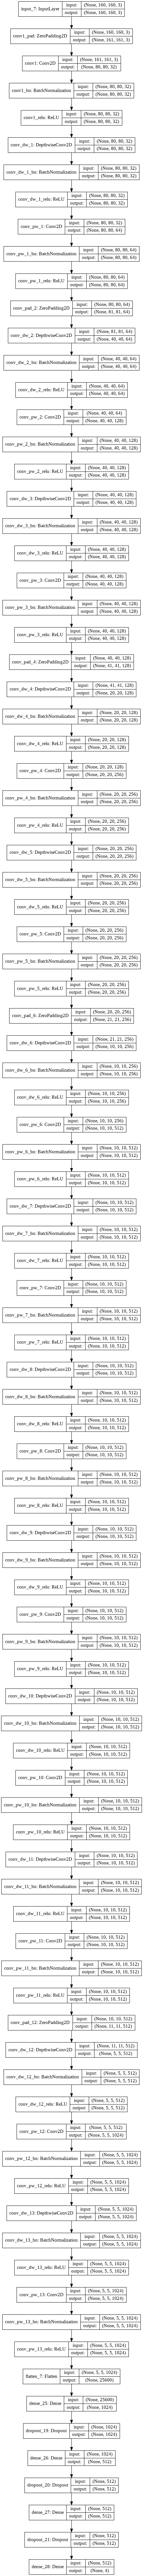

In [0]:
from keras.utils import plot_model
plot_model(model,show_shapes = True)

In [0]:
# build our own precision,recall and f1_score

from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
# train model
from keras.callbacks import EarlyStopping
opt = keras.optimizers.Adam(lr = 0.0001,decay = 1e-6 )
#opt = tf.train.experimental.enable_mixed_precision_graph_rewrite(opt)
CheckPoint = ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True,mode='auto',verbose=0)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy',f1_m])
	
es = EarlyStopping(monitor='val_loss', mode='auto')
callback = [es]
# fit=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=callback)

# for dataaugmentation
fit=model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train)/10, epochs=30,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/30
211/210 [==============================] - 73s 346ms/step - loss: 1.5289 - acc: 0.4765 - f1_m: 0.4555 - val_loss: 0.7481 - val_acc: 0.7268 - val_f1_m: 0.6713
Epoch 2/30
211/210 [==============================] - 57s 270ms/step - loss: 0.7903 - acc: 0.6904 - f1_m: 0.6832 - val_loss: 0.6184 - val_acc: 0.7742 - val_f1_m: 0.7654
Epoch 3/30
211/210 [==============================] - 58s 275ms/step - loss: 0.5284 - acc: 0.7996 - f1_m: 0.7992 - val_loss: 0.5805 - val_acc: 0.7932 - val_f1_m: 0.7850
Epoch 4/30
211/210 [==============================] - 58s 276ms/step - loss: 0.3377 - acc: 0.8766 - f1_m: 0.8780 - val_loss: 0.5814 - val_acc: 0.8159 - val_f1_m: 0.8135


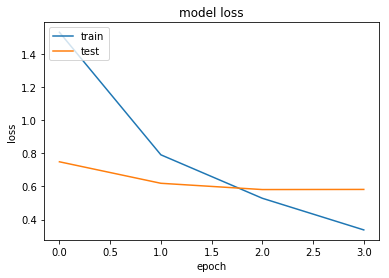

527/527 [==============================] - 1s 2ms/step
Test Loss: 0.5813803511054964
Test accuracy:  0.8159392792766867
F1 score:  0.813489244717122


In [0]:
# plotting graph and display score model

# def plot_history_loss(fit):
#     # Plot the loss in the history
#     axL.plot(fit.history['loss'],label="loss for training")
#     axL.set_title('model loss')
#     axL.set_xlabel('epoch')
#     axL.set_ylabel('loss')
#     axL.legend(loc='upper right')


# def plot_history_acc(fit):
#     # Plot the loss in the history
#     axR.plot(fit.history['acc'],label="accuracy")
#     axR.set_title('model accuracy')
#     axR.set_xlabel('epoch')
#     axR.set_ylabel('accuracy')
#     axR.legend(loc='upper right')

# ig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
# plot_history_loss(fit)
# plot_history_acc(fit)
# plt.show()

plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores=model.evaluate(X_test,y_test,verbose=1) #verbose=1:Display the progress
print('Test Loss:',scores[0])
print('Test accuracy: ', scores[1])
print('F1 score: ',scores[2])

              precision    recall  f1-score   support

        Thai       0.74      0.82      0.78       112
      Áo_dài       0.85      0.75      0.80       133
   Cheongsam       0.80      0.78      0.79       146
      dirndl       0.87      0.91      0.89       136

    accuracy                           0.82       527
   macro avg       0.81      0.82      0.81       527
weighted avg       0.82      0.82      0.82       527

           Thai  Áo_dài  Cheongsam  dirndl
Thai       0.82    0.03       0.10    0.05
Áo_dài     0.14    0.75       0.09    0.02
Cheongsam  0.08    0.08       0.78    0.06
dirndl     0.03    0.02       0.04    0.91


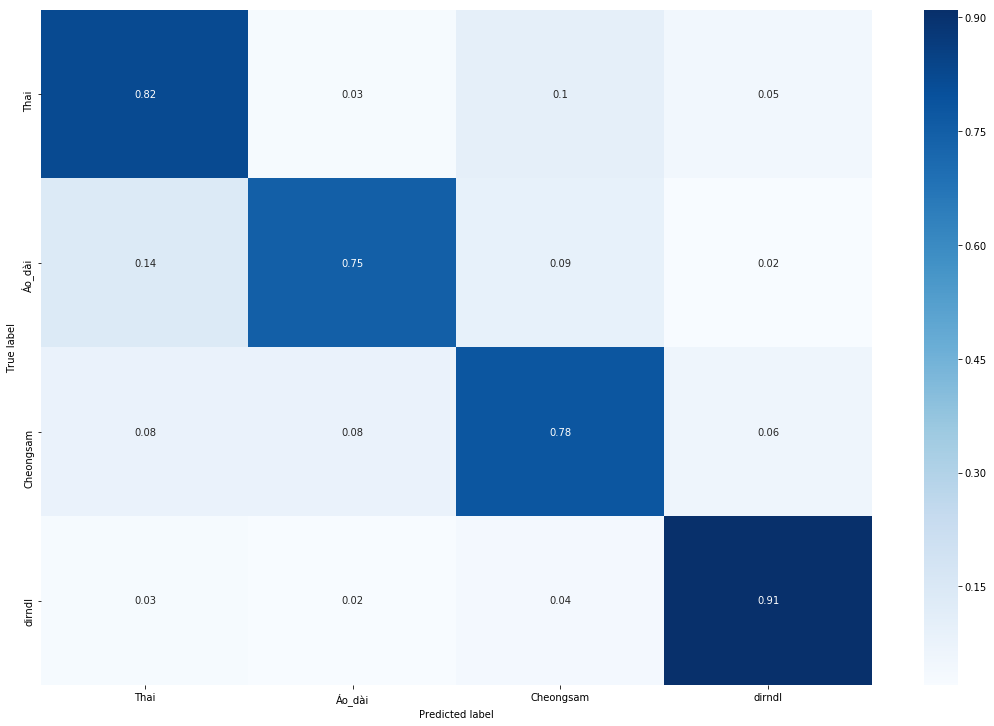

In [0]:
# display confusion metrics

y_true = np.array([])
for i in y_test:
  if i[0] == 1:
    y_true = np.append(y_true,0)
  elif i[1] == 1:
    y_true = np.append(y_true,1)
  elif i[2] == 1:
    y_true = np.append(y_true,2)  
  elif i[3] == 1:
    y_true = np.append(y_true,3)

import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report

# y_pred=model.predict_classes(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

# sess = tf.InteractiveSession()
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
# con_mat = con_mat.eval()
con_mat = tf.Session().run(con_mat)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
c = ['Thai', 'Áo_dài', 'Cheongsam', 'dirndl']
con_mat_df = pd.DataFrame(con_mat_norm, index = c, columns = c)
print(classification_report(y_true, y_pred, target_names = c))
print(con_mat_df)

import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(15, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



**Confusion matrix can't print 旗袍 so we use Cheongsam instead.**


**Analyse the results**

Form the result we got. Our model predicted Áo_dài to be ชุดไทย(0.14) more than 旗袍(0.09) so it mean that Áo_dài is similar to ชุดไทย more that 旗袍. Also, It seem like ชุดไทย and 旗袍 are more similar than Áo_dài and 旗袍 due to the model that predicted ชุดไทย to be 旗袍 for 0.10 and predicted 旗袍 to be ชุดไทย for 0.08(equal to Áo_dài) .  


### 3. Explain the model with LIME

As you might have realized, deep learning models can sometimes be quite fuzzy and difficult to explain. Fear not, there's a fantastic tool called [LIME](https://github.com/marcotcr/lime) which takes your model and explains why the model thinks it's a ชุดไทย or a dirndl. 

Your task is to learn how to use LIME (they have very detailed tutorials) and pick a few fun images to explain. See if the explaination matches what you expect.


Example (explaining prediction of 'Cat' in pros and cons): 

<img src="https://raw.githubusercontent.com/marcotcr/lime/master/doc/images/images.png" width="350">

In [0]:
# !pip install lime

In [0]:
#TODO: your answer for question 2 here

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from lime import lime_image


In [0]:
with tf.Session() as sess:
     sess.run(tf.global_variables_initializer())

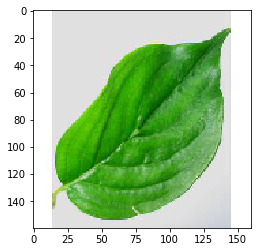

[('ชดไทย', 0.63832396), ('Áo_dài', 0.1852041), ('旗袍', 0.120511465), ('dirndl', 0.05596045)]
Predicted :  ชดไทย


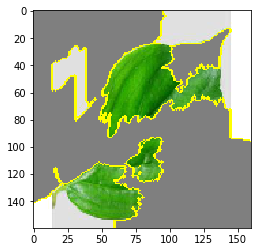

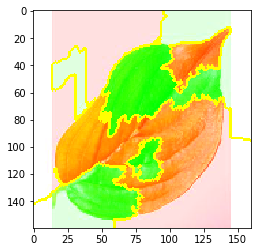

In [0]:
# dependencies = {
#      'f1_m': f1_m
# }
# model = keras.models.load_model('best_model.h5', custom_objects=dependencies)

# model = keras.models.load_model('best_model.h5')

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(160,160))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

images = transform_img_fn([os.path.join('./','000362.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()

preds = model.predict(images)
classes=["ชดไทย","Áo_dài","旗袍","dirndl"]

predict = max(preds[0])
a = [(classes[i], preds[0][i]) for i in range(len(classes))]
print(a)
print('Predicted : ',classes[list(preds[0]).index(predict)])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], model.predict, top_labels=4, hide_color=0, num_samples=1000)

from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=50, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()



### From the cell above. This picture is a picture from dirndl folder and it's not even a costume. Our model predicted it to be ชุดไทย so may be thai costume have similar pattern or texture to a leaf.

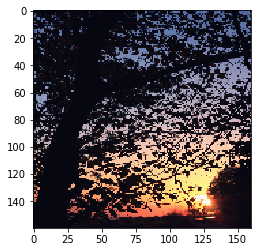

[('ชดไทย', 0.00085060555), ('Áo_dài', 0.0045421), ('旗袍', 0.99413496), ('dirndl', 0.00047239146)]
Predicted :  旗袍


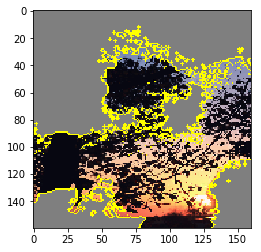

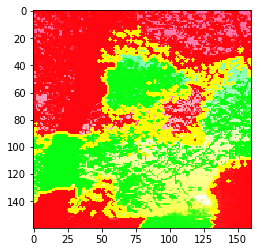

In [0]:
images = transform_img_fn([os.path.join('./','pic1.png')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()

preds = model.predict(images)
classes=["ชดไทย","Áo_dài","旗袍","dirndl"]

predict = max(preds[0])
a = [(classes[i], preds[0][i]) for i in range(len(classes))]
print(a)
print('Predicted : ',classes[list(preds[0]).index(predict)])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], model.predict, top_labels=4, hide_color=0, num_samples=1000)

from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=50, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

### From the cell above. We think that 旗袍 have a pattern like a flower on a plain color so we try to test it with this picture and it looks like we are right. 

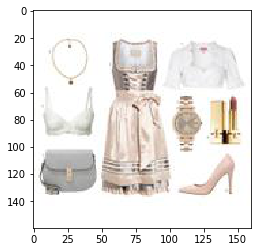

[0. 0. 0. 1.]
[('ชดไทย', 0.0035407185), ('Áo_dài', 0.00012687093), ('旗袍', 0.00020698324), ('dirndl', 0.9961254)]
Predicted :  dirndl


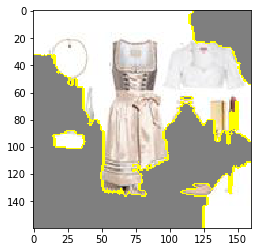

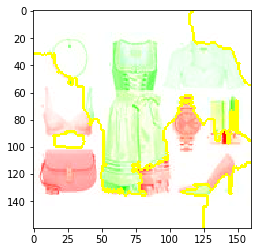

In [0]:
images = transform_img_fn([os.path.join('./dataset/dirndl/','000547.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
print(i)
preds = model.predict(images)
classes=["ชดไทย","Áo_dài","旗袍","dirndl"]

predict = max(preds[0])
a = [(classes[i], preds[0][i]) for i in range(len(classes))]
print(a)
print('Predicted : ',classes[list(preds[0]).index(predict)])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], model.predict, top_labels=4, hide_color=0, num_samples=1000)

from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=50, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

**Some proper example of Lime.**